In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *



In [2]:
ab = '../../lr_bulk/talon/human_talon_abundance.tsv'
filt_ab = '../../lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
read_annot = '../../lr_bulk/talon/human_talon_read_annot.tsv'
t_metadata = '../../refs/cerberus/v40_transcript_metadata.tsv'
swan_file = '../../lr_bulk/cerberus/swan/swan_meta.p'
cerberus_h5 = '../../lr_bulk/cerberus/triplets/cerberus_annot_triplets.h5'
major_isos = '../../lr_bulk/cerberus/swan/major_isos.tsv'
cerb_t_meta = '../../lr_bulk/cerberus/cerberus_transcript_metadata.tsv'
pi_tpm_sample = '../fig_4_sample_major/triplet_sample_pi_tpm.tsv'

ver = 'v40_cerberus'

min_tpm = 1
gene_subset = 'polya'
go_gene_subset = 'protein_coding'
predom_subset = 'protein_coding'
obs_col = 'sample'

mouse_ab = '../../mouse/lr_bulk/talon/mouse_talon_abundance.tsv'
mouse_filt_ab = '../../mouse/lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
mouse_read_annot = '../../mouse/lr_bulk/talon/mouse_talon_read_annot.tsv'
mouse_swan_file = '../../mouse/lr_bulk/swan/swan.p'
mouse_meta = '../../mouse/lr_bulk/lr_mouse_library_data_summary.tsv'
mouse_t_metadata = '../../mouse/refs/cerberus/vM25_transcript_metadata.tsv'
mouse_ver = 'vM25_cerberus'


## What is the expression level of lncRNAs vs. pseudogenes vs. protein coding genes?

In [3]:
# ca = cerberus.read(cerberus_h5)

In [4]:
# df = ca.triplets.loc[ca.triplets.source=='sample_det']

In [5]:
# gene_df, _, _ = get_gtf_info(how='gene', ver=ver)
# gene_df['gid'] = cerberus.get_stable_gid(gene_df, col='gid')
# df = df.merge(gene_df[['gid', 'biotype_category']], how='left', on='gid')

In [6]:
# c_dict, order = get_talon_nov_colors(cats=['Known'])
# c = c_dict['Known']
# biotypes = ['protein_coding', 'lncRNA', 'pseudogene']
# b_dict = {'protein_coding': 'Protein coding',
#           'lncRNA': 'lncRNA',
#           'pseudogene': 'Pseudogene'}
# c_dict, order = get_shade_colors(c, biotypes)

In [7]:
# df.head()

In [8]:
# # for b in df.biotype_category.unique():
# #     c = c_dict[b]
# #     temp = df.loc[df.biotype_category==b]
# #     ax = sns.scatterplot(data=df, x='gene_tpm', y='n_iso')
# #     ax.title(b)
# #     plt.show()
# #     plt.clf()
# g = sns.FacetGrid(df, col='biotype_category')
# # g.map(sns.scatterplot, 'gene_tpm', 'n_iso', s=10, alpha=0.5)
# g.map(sns.histplot, 'gene_tpm', 'n_iso')
# g.set(xscale="log", ylim=(0,150))

In [9]:
# sns.jointplot(data=df, x='gene_tpm', y='n_iso',
#               hue='biotype_category',
#               joint_kws={'data':df, 's':10, 'alpha':0.5})

In [39]:
def plot_exp_v_iso_biotype_boxplot(h5,
                                   ver,
                                   ofile):
    ca = cerberus.read(h5) 
    
    # limit to the sample dets
    df = ca.triplets.loc[ca.triplets.source=='sample_det'].copy(deep=True)
    
    # tpm bins
    tpm_bins = [1, 10, 100, df.gene_tpm.max()]
    labels = ['Low (1-10)', 'Medium (10-100)', 'High (100-max)']
    
    # get the most highly-expressed sample per gene
    df = df.sort_values(by=['gid', 'gene_tpm'], ascending=[False,False])
    df = df.drop_duplicates(subset='gid', keep='first')

    # group into bins
    df['tpm_bin'] = pd.cut(df.gene_tpm, tpm_bins, labels=labels)
    df['other_tpm_bin'] = pd.cut(df.gene_tpm, tpm_bins)
    print(df.other_tpm_bin.unique())

    # add gene biotypes
    gene_df, _, _ = get_gtf_info(how='gene', ver=ver)
    gene_df['gid'] = cerberus.get_stable_gid(gene_df, col='gid')
    df = df.merge(gene_df[['gid', 'biotype_category']], how='left', on='gid')
    
    order = get_polya_cats()
    disp_dict = {'protein_coding': 'Protein coding',
                 'lncRNA': 'lncRNA',
                 'pseudogene': 'Pseudogene'}
    order = [disp_dict[b] for b in order]
    df['biotype_category_disp'] = df.biotype_category.map(disp_dict)

    c = get_talon_nov_colors()[0]['Known']
    c_dict, order = get_shade_colors(c, order)

    sns.set_context('paper', font_scale=1.8)
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['pdf.fonttype'] = 42

    ax = sns.catplot(data=df,
                     x='tpm_bin',
                     y='n_iso',
                     hue='biotype_category_disp',
                     kind='box',
                     hue_order=order,
                     palette = c_dict,
                     fliersize=1,
                     linewidth=1,
                     height=4, aspect=(5/4),
                     saturation=1)
   
    ax.set(ylim=(0,50), xlabel='Max. gene expression (TPM)', ylabel='# transcripts / gene')
    ax.tick_params(axis="x", rotation=45)

    fname = ofile
    plt.savefig(fname, dpi=500, bbox_inches='tight')
    
    return df


In [43]:
len(df.index)

26781

[(10.0, 100.0], (100.0, 87160.203], (1.0, 10.0], NaN]
Categories (3, interval[float64, right]): [(1.0, 10.0] < (10.0, 100.0] < (100.0, 87160.203]]


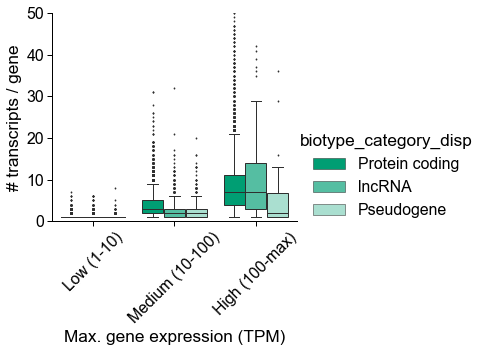

In [40]:
df = plot_exp_v_iso_biotype_boxplot(cerberus_h5,
                                    ver,
                                    'figures/exp_v_iso_biotype_box.pdf')

In [42]:
# get median of each biotype category in highest tpm bin
for b in df.biotype_category.unique():
    m = df.loc[(df.tpm_bin.str.contains('High'))&\
               (df.biotype_category==b)].n_iso.median()
    print(f'Median # isoforms for high tpm {b} genes is {m}')

Median # isoforms for high tpm protein_coding genes is 7.0
Median # isoforms for high tpm lncRNA genes is 7.0
Median # isoforms for high tpm pseudogene genes is 2.0


In [10]:
## How many isoforms do we see for highly-expressed vs. lowly-expressed lncs?
## How does this compare to protein coding genes?
ca = cerberus.read(cerberus_h5)

In [23]:
# limit to the sample dets
df = ca.triplets.loc[ca.triplets.source=='sample_det'].copy(deep=True)

In [24]:
tpm_bins = [1, 10, 100, df.gene_tpm.max()]
labels = ['Low (1-10)', 'Medium (10-100)', 'High (100-max)']

In [36]:
# get the most highly-expressed sample per gene
df = df.sort_values(by=['gid', 'gene_tpm'], ascending=[False,False])
df = df.drop_duplicates(subset='gid', keep='first')

# group into bins
df['tpm_bin'] = pd.cut(df.gene_tpm, tpm_bins, labels=labels)
df['other_tpm_bin'] = pd.cut(df.gene_tpm, tpm_bins)
print(df.other_tpm_bin.unique())

# add gene biotypes
gene_df, _, _ = get_gtf_info(how='gene', ver=ver)
gene_df['gid'] = cerberus.get_stable_gid(gene_df, col='gid')
df = df.merge(gene_df[['gid', 'biotype_category']], how='left', on='gid')

[(10.0, 100.0], (100.0, 87160.203], (1.0, 10.0], NaN]
Categories (3, interval[float64, right]): [(1.0, 10.0] < (10.0, 100.0] < (100.0, 87160.203]]


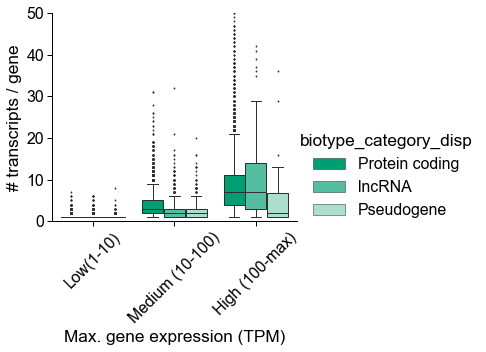

In [35]:
order = get_polya_cats()
disp_dict = {'protein_coding': 'Protein coding',
             'lncRNA': 'lncRNA',
             'pseudogene': 'Pseudogene'}
order = [disp_dict[b] for b in order]
df['biotype_category_disp'] = df.biotype_category.map(disp_dict)

c = get_talon_nov_colors()[0]['Known']
c_dict, order = get_shade_colors(c, order)

sns.set_context('paper', font_scale=1.8)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

ax = sns.catplot(data=df,
                 x='tpm_bin',
                 y='n_iso',
                 hue='biotype_category_disp',
                 kind='box',
                 hue_order=order,
                 palette = c_dict,
                 fliersize=1,
                 # flierprops={'marker':'x'},
                 linewidth=1,
                 height=4, aspect=(5/4),
                 saturation=1)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.set(ylim=(0,125), xlabel='Gene expression (TPM)', ylabel='# transcripts / gene')
ax.set(ylim=(0,50), xlabel='Max. gene expression (TPM)', ylabel='# transcripts / gene')
# ax.legend(title='')
ax.tick_params(axis="x", rotation=45)
# plt.legend(bbox_to_anchor=(.5, 1.05))

fname = 'figures/n_iso_by_tpm_biotyps.pdf'
plt.savefig(fname, dpi=500, bbox_inches='tight')

# for i in range(len(ax.patches)-len(tpm_bins)+1):
#     # k = i+len(tpm_bins)-1
#     # if (i)%(len(tpm_bins)-1) == 0:
#     #     if i == 0:
#     #         j = 0
#     #     else:
#     #         j += 1
#     #     biotype = order[j]
#     #     c = c_dict[biotype]
#     k = i/3
#     b = order[b]
    
#     ax.patches[i].set_facecolor('white')
#     ax.patches[i].set_edgecolor(c)
    

# _ = ax.set_xticklabels([disp_dict[b] for b in order])  

In [27]:
# number in each category
temp = df[['gid', 'tpm_bin', 'biotype_category']].groupby(['tpm_bin', 'biotype_category']).count().reset_index()
temp.rename({'gid': 'n_genes'}, axis=1, inplace=True)
temp

,tpm_bin,biotype_category,n_genes
0,Low(1-10),lncRNA,2676
1,Low(1-10),protein_coding,1501
2,Low(1-10),pseudogene,1035
3,Medium (10-100),lncRNA,1270
4,Medium (10-100),protein_coding,7148
5,Medium (10-100),pseudogene,440
6,High (100-max),lncRNA,137
7,High (100-max),protein_coding,8436
8,High (100-max),pseudogene,66


In [7]:
## How many isoforms do we see for highly-expressed vs. lowly-expressed lncs?
## How does this compare to protein coding genes?

In [9]:
high_tpm = 100
low_tpm = 20

In [16]:
high_df = df.loc[df.gene_tpm>high_tpm]
high_df['tpm_category'] = 'high'
low_df = df.loc[df.gene_tpm<low_tpm]
low_df['tpm_category'] = 'low'
temp = pd.concat([high_df, low_df], axis=0)

In [17]:
temp.head()

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,sector,gname,sample,gene_tpm,biotype_category,tpm_category
0,sample_det,ENSG00000000003,1.0,5.0,6.0,16.0,2.000000,0.125000,0.625000,0.250000,tes,TSPAN6,h9_neural_crest,305.837311,protein_coding,high
4,sample_det,ENSG00000001036,1.0,3.0,7.0,9.0,3.500000,0.133333,0.400000,0.466667,mixed,FUCA2,h9_neural_crest,227.335907,protein_coding,high
9,sample_det,ENSG00000001497,1.0,2.0,7.0,7.0,4.666667,0.130435,0.260870,0.608696,splicing,LAS1L,h9_neural_crest,144.398911,protein_coding,high
11,sample_det,ENSG00000001630,3.0,4.0,6.0,7.0,1.714286,0.344262,0.459016,0.196721,mixed,CYP51A1,h9_neural_crest,442.284485,protein_coding,high
15,sample_det,ENSG00000002549,1.0,3.0,5.0,5.0,2.500000,0.153846,0.461538,0.384615,mixed,LAP3,h9_neural_crest,242.651428,protein_coding,high


[(0.0, 125.0), Text(0.5, 0, ''), Text(0, 0.5, '# transcripts / gene / sample')]

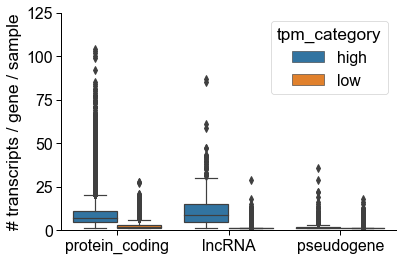

In [24]:
order = get_polya_cats()
sns.set_context('paper', font_scale=1.8)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

ax = sns.boxplot(data=temp,
                 x='biotype_category',
                 y='n_iso',
                 hue='tpm_category',
                 order=order)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(ylim=(0,125), xlabel='', ylabel='# transcripts / gene / sample')

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

ab = '../../lr_bulk/talon/human_talon_abundance.tsv'
filt_ab = '../../lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
read_annot = '../../lr_bulk/talon/human_talon_read_annot.tsv'
t_metadata = '../../refs/cerberus/v40_transcript_metadata.tsv'
swan_file = '../../lr_bulk/cerberus/swan/swan_meta.p'
cerberus_h5 = '../../lr_bulk/cerberus/triplets/cerberus_annot_triplets.h5'
major_isos = '../../lr_bulk/cerberus/swan/major_isos.tsv'
cerb_t_meta = '../../lr_bulk/cerberus/cerberus_transcript_metadata.tsv'
pi_tpm_sample = '../fig_4_sample_major/triplet_sample_pi_tpm.tsv'

ver = 'v40_cerberus'

min_tpm = 1
gene_subset = 'polya'
go_gene_subset = 'protein_coding'
predom_subset = 'protein_coding'
obs_col = 'sample'

mouse_ab = '../../mouse/lr_bulk/talon/mouse_talon_abundance.tsv'
mouse_filt_ab = '../../mouse/lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
mouse_read_annot = '../../mouse/lr_bulk/talon/mouse_talon_read_annot.tsv'
mouse_swan_file = '../../mouse/lr_bulk/swan/swan.p'
mouse_meta = '../../mouse/lr_bulk/lr_mouse_library_data_summary.tsv'
mouse_t_metadata = '../../mouse/refs/cerberus/vM25_transcript_metadata.tsv'
mouse_ver = 'vM25_cerberus'


In [2]:
# hack the heckberton out of this
# make the density plots and bar plots split by high tpm 
# and low tpm triplets for each biotype

In [6]:
ca = cerberus.read(cerberus_h5)
df = ca.triplets
gene_df, _, _ = get_gtf_info(how='gene', ver=ver)
gene_df['gid'] = cerberus.get_stable_gid(gene_df, col='gid')
df = df.merge(gene_df[['gid', 'biotype_category']], how='left', on='gid')


In [4]:
fake_triplets = pd.DataFrame()
sources = []
titles = []
tpm_dict = {'high': 100,
            'low': 20}
for b in get_polya_cats():
    for cat, tpm in tpm_dict.items():
        
        # first get entries that satisfy 
        # the category
        temp = df.loc[(df.source=='sample_det')&\
              (df.biotype_category==b)]
        # replace 0 expression w/ nan and take the mean
        temp['gene_tpm'] = temp['gene_tpm'].replace(0, np.nan)
        temp = temp[['gid', 'gene_tpm']].groupby('gid').mean().reset_index()
        
        # get gids of genes whose avg. exp is high or low
        if cat == 'high':
            gids = temp.loc[temp.gene_tpm>tpm, 'gid'].unique().tolist()
        elif cat == 'low':
            gids = temp.loc[temp.gene_tpm<tpm, 'gid'].unique().tolist()
        
        # now get the triplets entries that satisfy this
        # and change the source
        temp = df.loc[(df.gid.isin(gids))&(df.source=='obs_det')]
        source_name = f'{b}_{cat}_tpm'
        temp['source'] = source_name
        sources.append(source_name)
        
        b_name_map = {'protein_coding': 'Protein coding',
                      'pseudogene': 'Pseudogene',
                      'lncRNA': 'lncRNA'}
        title = f'{cat.capitalize()} TPM {b_name_map[b]}'
        titles.append(title)
        
        # and append
        fake_triplets = pd.concat([fake_triplets, temp], axis=0)

In [5]:
ca.triplets = fake_triplets
ca.write('fake_triplets.h5')

NameError: name 'ca' is not defined

In [ ]:
plot_density_simplices('fake_triplets.h5', 
                       ab,
                       min_tpm,
                       sources,
                       titles, 
                       'polya',
                       ver)